# Relations and directed graphs

## MTH 325, Grand Valley State University, Winter 2017

## Overview 

__Summary:__ This lesson begins a new module for our class in which we will study one of the three main _discrete structures_ of this course, namely the idea of a __relation__. Relations are quite simple to grasp, and this will be our first order of business. Then we will spend a good amount of time discussing how to _represent_ relations as _data structures_ as _lists of tuples_, as _directed graphs_, as _matrices_, and as _Python dictionaries_ with the ultimate goal of being able to switch from one to the other. We'll also take time to see how we can work with relations in Python. 

Note that none of this material appears in our usual textbook. 

This lesson addresses the following learning target(s):

+ **R.1:** I can represent a relation in different ways and change representations from one to another. 

---

## Background

### Part 1: Relations

Suppose a Mathematics Department consists of five faculty members: Alice, Bob, Chuck, Dave, and Ed. There are three committees in the department: the Curriculum Committee, the Student Affairs Committee, and the Advisory Committee. The table below shows the committees to which each member belongs: 

| Faculty | Committees this faculty member belongs to | 
|:------- | :---------------------------------------- |
| Alice   | Advisory, Student Affairs                 |
| Bob     | Advisory                                  | 
| Chuck   | Curriculum                                | 
| Dave    | Curriculum, Student Affairs               | 
| Ed      | Curriculum                                |

This is like a little database, and it could be useful if, for example, we were thinking about asking one of these faculty members to join a new committee -- we could look them up in this database and see the committees they already belong to, and this could help our decision making. 

In other words what this table does is _relate_ two things: The first "thing" is a faculty member and the second "thing" is a committee. Alice is "related to" both the Advisory and Student Affairs committees. Chuck is "related to" Curriculum. Here we are using the phrase "related to" as a way of saying "is a member of". 

If this is useful then it's worth thinking about how we might represent this table in a computer. Tables themselves are not really computer-friendly. Here is one way: _Store the table as a list of ordered pairs or "tuples"._ For example, the table above would be: 

    [(Alice, Advisory), (Alice, Student Affairs), (Bob, Advisory), (Chuck, Curriculum), (Dave, Curriculum), 
    (Dave, Student Affairs), (Ed, Curriculum)]
    
This has the advantage that it's easy to iterate over the list and, for example, find all the pairs that have Alice in the "first coordinate" and then return the "second coordinate". This would print off the committees that Alice belongs to.

Here's another database-like structure that could be useful. Suppose we have five students: Ronald, Scott, Trish, Uriah, and Victoria. These students have joined a new social network called ChapSnat. In ChapSnat, user "follow" other users by clicking a button. _This relationship does not have to go both ways_ -- one user can follow another without the other user following back. Here is a table like the one above that shows the state of affairs on ChapSnat: 

| User | Follows these users:             | 
|:---  | :------------------------------  | 
| Ronald | Scott, Trish                   |
| Scott  | Uriah, Trish                   |
| Trish  | (nobody)                       | 
| Uriah  | Ronald, Scott, Trish, Victoria | 
| Victoria | Uriah, Scott                 | 

Here too, this table is like a database that "relates" two things -- this time each "thing" is a user. Ronald is "related to" Scott  in the sense of "related to" = "follows". Ronald is also "related to" and Trish. Trish is related to nobody. And so on. 

As a list of tuples, this table would look like this: 

    [(Ronald, Scott), (Ronald, Trish), (Scott, Uriah), (Scott, Trish), (Uriah, Ronald), (Uriah, Scott), 
    (Uriah, Trish), (Uriah, Victoria), (Victoria, Uriah), (Victoria, Scott)]

Notice there are no pairs starting with Trish, because Trish doesn't follow anyone. 

What we are seeing here are two instances of a general, abstracted mathematical idea that has great power: 

>__Definition:__ A _relation_ from a set $A$ to a set $B$ is a set of ordered pairs $(a,b)$ with $a \in A$ and $b \in B$. That is, a relation from $A$ to $B$ is a subset of the cartesian product $A \times B$. 

[Click here for a quick review of the cartesian product](http://study.com/academy/lesson/how-to-find-the-cartesian-product.html) if this term is unfamiliar. 

So in the first example above, the table that shows the faculty and committees is a relation from the set $A = \{ \text{Alice, Bob, Chuck, Dave, Ed}\}$ to the set $B = \{\text{Advisory, Student Affairs, Curriculum}\}$. Just like our list of ordered pairs, a relation is a _set_ whose elements consist of ordered pairs or "tuples" where the first coordinate comes from $A$ and the second one comes from $B$. It doesn't consist of _all possible_ pairs of this form; just the ones specified by the table. Specifically, the relation given in the table is the set: 

>{(Alice, Advisory), (Alice, Student Affairs), (Bob, Advisory), (Chuck, Curriculum), (Dave, Curriculum), (Dave, Student Affairs), (Ed, Curriculum)}

And in the second example about social media, the relation would be given by this set: 

>{(Ronald, Scott), (Ronald, Trish), (Scott, Uriah), (Scott, Trish), (Uriah, Ronald), (Uriah, Scott), (Uriah, Trish), (Uriah, Victoria), (Victoria, Uriah), (Victoria, Scott)}

Again: _A relation is just a set of ordered pairs. If we are talking about a relation "from" a set $A$ "to" a set $B$, then the first coordinate of each pair must belong to $A$, and the second coordinate must belong to $B$. 

In the second example above, this is a relation from $A = \{\text{Ronald, Scott, Trish, Uriah, Victoria}\}$ to $B = \{\text{Ronald, Scott, Trish, Uriah, Victoria}\}$. Of course the sets $A$ and $B$ are the same this time as you can see. In other words, ChapSnat is a relation from $A$ __to itself__. Relations where the first and second sets are the same are very important for us, for example they model social networks. We have this definition for these kinds of relations where the two sets being related are the same: 

>__Definition:__ A relation from a set $A$ to itself is called a _relation on $A$_. That is, a relation on $A$ is a subset of the Cartesian product $A \times A$. 

In this language, ChapSnat is a relation on the set $\{\text{Ronald, Scott, Trish, Uriah, Victoria}\}$. And again, this means that the relation is a set of tuples where the first coordinate comes from this set and so does the second coordinate. 

### Part 2: Representing Relations

We are mostly going to be concerned with relations on a single set, like ChapSnat. There are at least four different ways we can represent a relation on a set. 

First: We can represent the relation __as a list of tuples.__ This is how we did the ChapSnat relation above and it's very true to the definition of relation as a subset of $A \times A$. Note: We can't use any of these representations if we are working with a relation from $A$ to $B$ where these two sets are different. We'll talk about representations of relations where the two sets are different in our class meeting. 

Another way to represent the relation is as an __adjacency matrix__. We've met adjacency matrices before, for graphs: If $G$ is a graph with $n$ vertices, we make an $n \times n$ matrix with the rows and columns representing the nodes, and put a "0" in the $(i,j)$-entry if nodes $i$ and $j$ are not adjacent, and put a "1" if they are. We can create a similar adjacency for a relation on a set $A$: 

1. Create one row and one column for each element of $A$. (Use the same ordering in both the rows and columns.0
2. If the ordered pair $(i,j)$ belongs to the relation, then put a 1 in the row $i$, column $j$ entry of the matrix. Otherwise put a 0. 

For example, here is the matrix for the ChapSnat relation, assuming the first row and column represent Ronald, the second row and second column represent Scott, and so on: 

<img src="bookfacematrix.png" height=200 width=200>

What's very different here about adjacency matrices for relations is that **the order of the pairs matters**. For example in the ChapSnat social network, Ronald follows Trish _but not vice versa_. So there would be a "1" in the row for Ronald and the column for Trish but a "0" in the row for Trish and the column for Ronald. We can't rely on symmetry to construct the adjacency matrix for a relation like we can for a graph, because relations are not necessarily "symmetric"; in fact most relationships in everyday life are highly non-symmetric, for example Twitter -- celebrities may have millions of followers but only themselves follow a small handful of people. 


A third way of representing a relation is _visually_ as follows. 

1. Create a circle or dot for each element in $A$, the set that the relation is working on. 
2. If $i, j \in A$ and $i$ is related to $j$, then draw an arrow from $i$ to $j$. 

Here is the picture for ChapSnat: 

<img src="bfgraph.png">

Here, the "head" of the arrow is just a darkened part of the edge. 

This kind of construction is called a __directed graph__. We briefly discussed directed graphs earlier in the course. These are just like undirected graphs as we have studied all semester, except here the edges aren't line segments but _arrows_ -- each edge has an _initial vertex_ and a _terminal vertex_ and we speak of an edge _starting at_ a vertex and _ending at_ a vertex. Each user in ChapSnat is a node and the relationship is visualized by drawing an arrow from node 1 to node 2 if node 1 follows node 2. 

Note that sometimes the term "directed graph" is abbreviated as "digraph". In the future we will make a distinction between _directed graphs_ and _undirected graphs_ (which is what we've studied in the course up to now). 

Finally, a fourth way to represent a relation on a set $A$ is using Python syntax, namely the __dictionary__. A dictionary representation of a relation has the points of $A$ as the keys, and then the list of values following a key are the points to which the key is related. For example here is ChapSnat as a dictionary: 

    {'Ronald': ['Trish', 'Scott'],
     'Scott': ['Trish', 'Uriah'],
     'Trish': [],
     'Uriah': ['Ronald', 'Trish', 'Scott', 'Victoria'],
     'Victoria': ['Uriah', 'Scott']}
     
(The names are in quotes now because they are strings, and we need to remember to work with them as strings if we are going to do computer stuff with them.) The dictionary form is nice because basically it looks exactly like the original table. 

An important learning target for us early on in our study of relations is to be able to represent any given relation on a set in all four of these formats. As we will see below, the computer will help us greatly. 


---

To sum up parts 1 and 2: 

+ A relation from $A$ to $B$ is a set, consisting of ordered pairs drawn from the cartesian product $A \times B$. 
+ If $A$ and $B$ are the same then we just talk about a "relation on $A$". 
+ A relation encapsulates the idea of "relationships" in real life by pairing off items in one set with related items in another. Think: Databases and social networks.
+ Relations can be represented in four ways: as _lists of tuples_, as _adjacency matrices_, as _directed graphs_, and as _Python dictionaries_. 


### Part 3: Directed graphs in Python

Creating directed graphs in Python is only a little different than creating undirected graphs. Here's an example for you to study. 

In [1]:
# The usual boilerplate to load the libraries and silence system warnings:

import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt

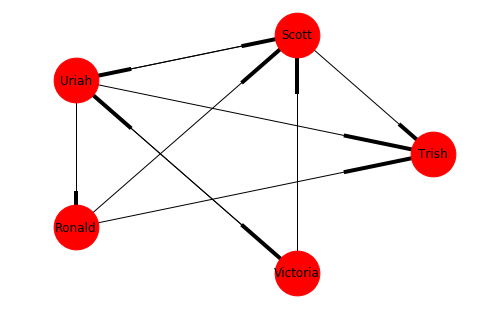

In [2]:
# Let's first set up the edge list for our relation. 

chapsnat_edges = [('Ronald', 'Scott'), ('Ronald', 'Trish'), ('Scott', 'Uriah'), ('Scott', 'Trish'), 
                  ('Uriah', 'Ronald'), ('Uriah', 'Scott'), ('Uriah', 'Trish'), ('Uriah', 'Victoria'), 
                  ('Victoria', 'Uriah'), ('Victoria', 'Scott')]

# Here's how to tell networkX you have a directed graph.
# It's exactly the same process as undirected graphs except you use DiGraph intead of Graph. 

chapsnat = nx.DiGraph(chapsnat_edges)

# Once we have this defined, we can visualize using Matplotlib: 

nx.draw_circular(chapsnat, with_labels = True, node_size = 2000)
plt.show()

You can work with digraphs in basically the same way we work with undirected graphs, including changing representations. Here's how to convert to a dictionary: 

In [3]:
nx.to_dict_of_lists(chapsnat)

{'Ronald': ['Trish', 'Scott'],
 'Scott': ['Trish', 'Uriah'],
 'Trish': [],
 'Uriah': ['Trish', 'Scott', 'Ronald', 'Victoria'],
 'Victoria': ['Uriah', 'Scott']}

If you wanted to convert a graph to an edge list, do this: 

In [4]:
chapsnat.edges()

[('Scott', 'Trish'),
 ('Scott', 'Uriah'),
 ('Uriah', 'Trish'),
 ('Uriah', 'Scott'),
 ('Uriah', 'Ronald'),
 ('Uriah', 'Victoria'),
 ('Ronald', 'Trish'),
 ('Ronald', 'Scott'),
 ('Victoria', 'Uriah'),
 ('Victoria', 'Scott')]

If you want to convert to an adjacency matrix... it's a little complicated. There _is_ an `.adjacency_matrix()` method available, but it doesn't work the way you think it does: 

In [5]:
nx.adjacency_matrix(chapsnat)

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

If you try printing this: 

In [6]:
print(nx.adjacency_matrix(chapsnat))

  (1, 0)	1
  (1, 2)	1
  (2, 0)	1
  (2, 1)	1
  (2, 3)	1
  (2, 4)	1
  (3, 0)	1
  (3, 1)	1
  (4, 1)	1
  (4, 2)	1


This is storing the matrix as a "sparse matrix" which means "0" entries aren't stored at all -- only the "1" entries. Anyway, it's not what we normally think of as a matrix. An earlier programming problem from the course would be handy here. 

## Summing up

1. A _relation from a set $A$ to a set $B$_ is a subset of $A \times B$. That means it is a set, whose elements are ordered pairs with the first coordinates coming from $A$ and the second coordinates coming from $B$. 
2. A _relation on a set $A$_ is a subset of $A \times A$. 
3. Relations are used to model relationships, like databases. 
4. In addition to representing relations as sets of ordered pairs, we can represent relations in at least four different ways: As a _list of pairs_, as _adjacency matrices_, as _directed graphs_ or _digraphs_, and as _dictionaries_. 
5. networkX can draw directed graphs the same way it draws undirected graphs. All that has to be altered is to use `nx.DiGraph()` instead of `nx.Graph()` when constructing it. 